# Road Signs and Traffic Light Tracking

## YOLO

One popular and powerful technique used in computer vision for object detection
is called **YOLO** (You Only Look Once). YOLO aims to identify and locate
objects in an image or video stream in real-time. Unlike traditional methods
that rely on complex pipelines and multiple passes, YOLO takes a different
approach by treating object detection as a single regression problem.  YOLO's
algorithm divides the input image into a grid and predicts bounding boxes and
class probabilities for objects within each grid cell. It simultaneously
predicts the class labels and their corresponding bounding boxes, making it
incredibly efficient and fast. YOLO is known for its real-time performance,
enabling it to process images and videos at impressive speeds.

We will employ YOLOv8 developed by `ultralytics`. We will also need `pillow`, `ray` and
`pandas` for file format support, scaling AI applicaiton and data visualisation respectively.

In [ ]:
!pip install ultralytics pillow pandas ray tqdm seaborn matplotlib

In [12]:
import os
import random
import pandas as pd
import cv2
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')
sns.set_theme(rc={'axes.facecolor': '#eae8fa'}, style='darkgrid')
sns.set_theme(style='darkgrid')

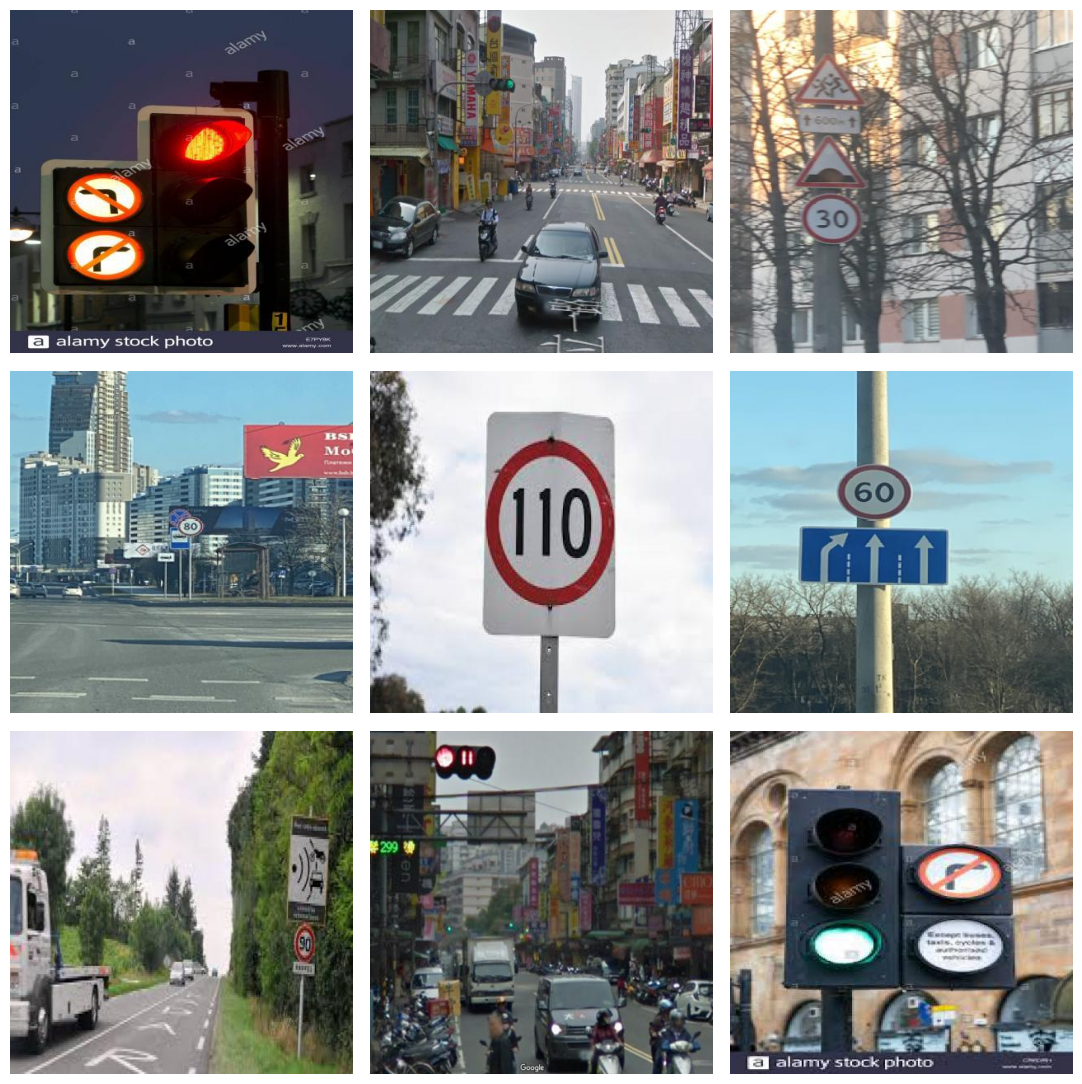

In [13]:
Image_dir = './car/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.axis('off')

plt.tight_layout()
plt.show()

### Training and validating YOLO NN

<div class="alert alert-block alert-info">
⚠️ Running the following cell will trigger the actual neural network training, i.e. a very resource/time intensive task.
</div>

In [ ]:
final_model = YOLO('yolov8n.pt')  
results = final_model.train(data="./car/data.yaml",epochs = 30, batch = -1, optimizer = 'auto')

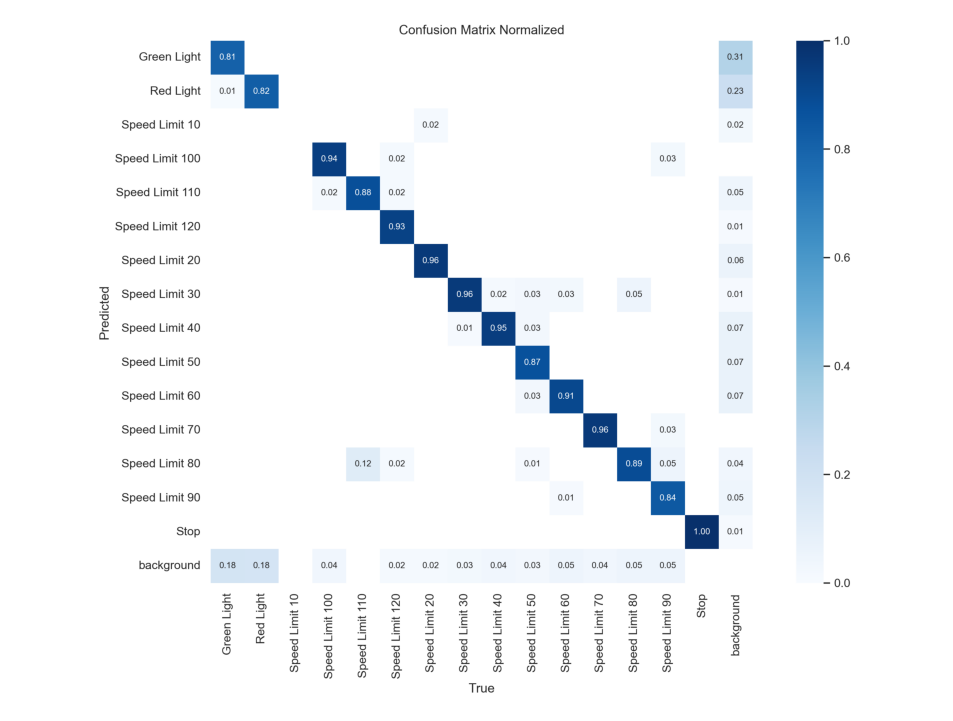

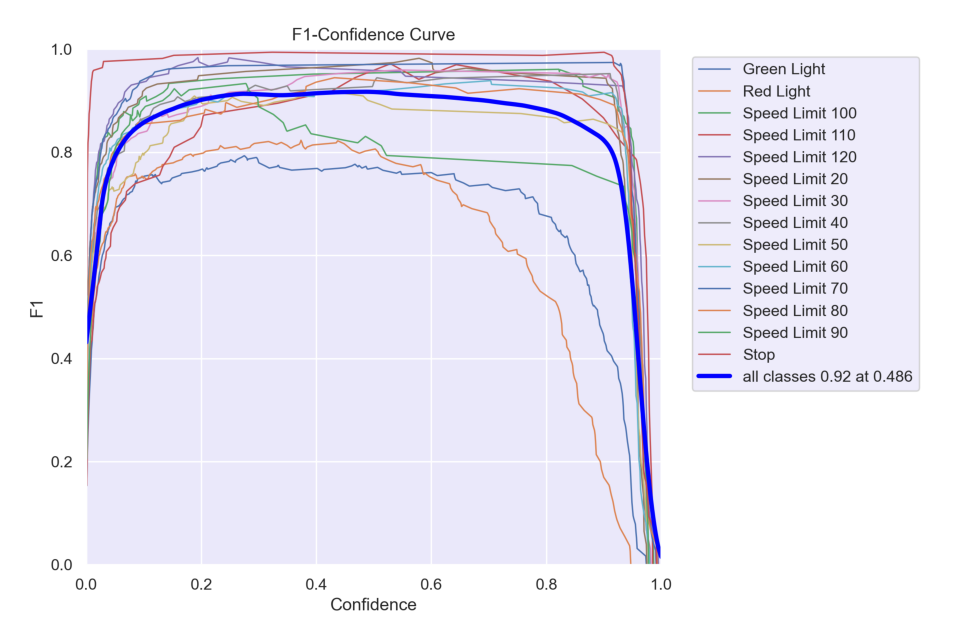

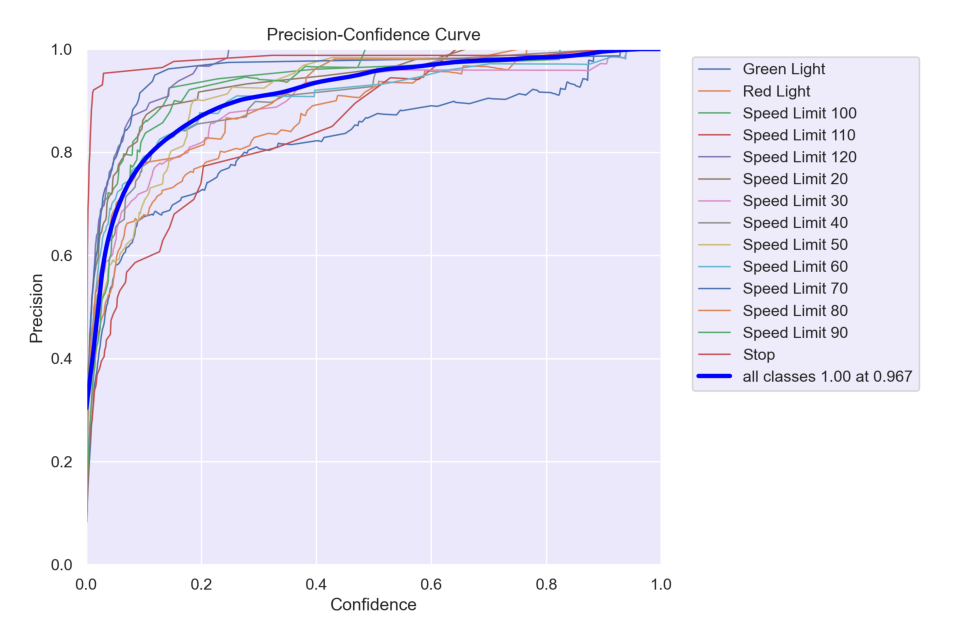

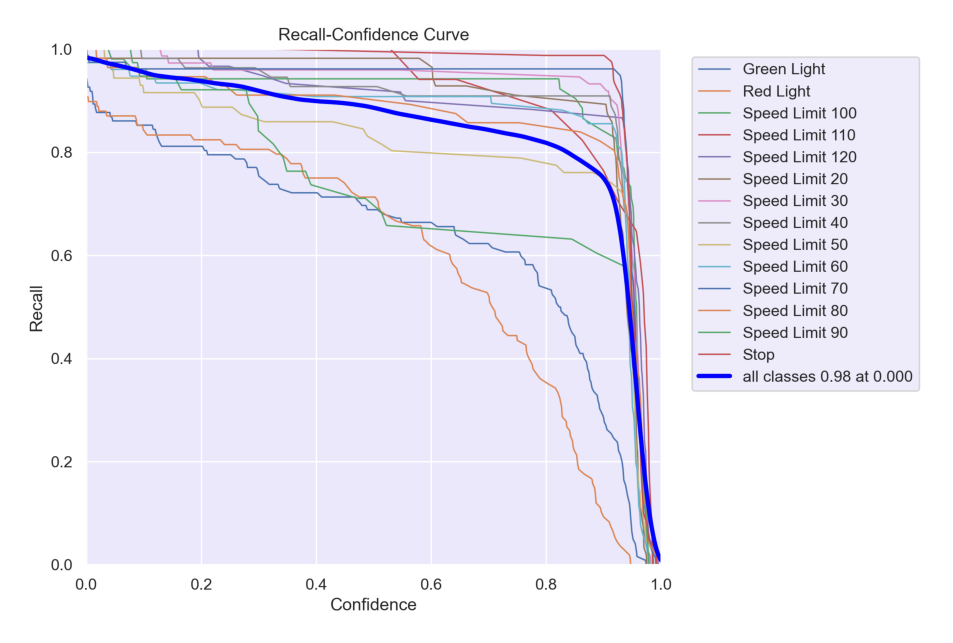

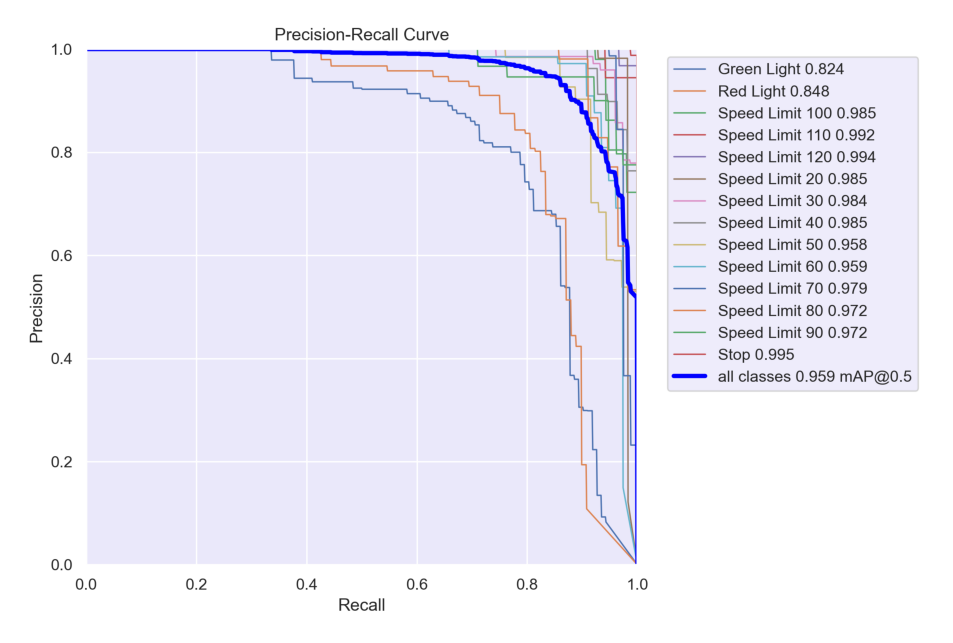

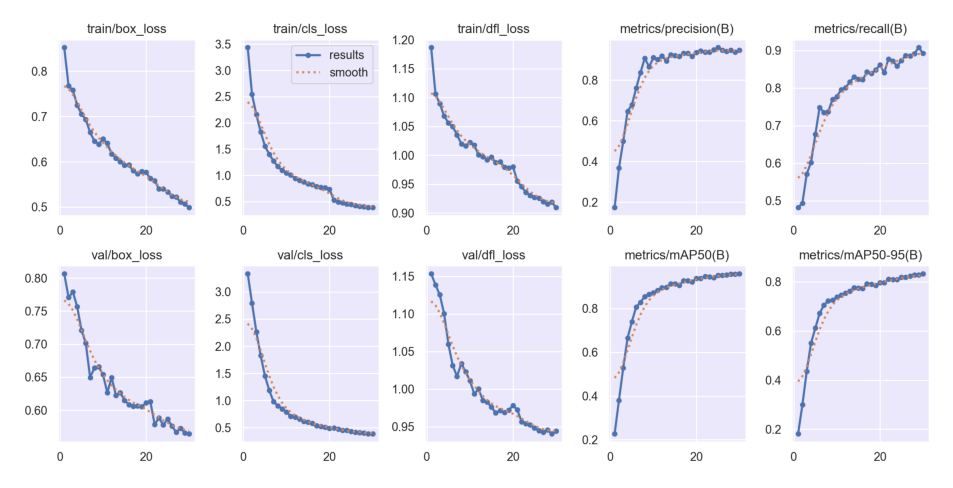

In [ ]:
def display_images(train_summary_path, image_files):
    for image_file in image_files:
        image_path = os.path.join(train_summary_path, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        plt.figure(figsize=(10, 10), dpi=120)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

image_files = [
    'confusion_matrix_normalized.png',
    'F1_curve.png',
    'P_curve.png',
    'R_curve.png',
    'PR_curve.png',
    'results.png'
]
train_summary_path = './runs/detect/train3'

display_images(train_summary_path, image_files)


In [ ]:
# Best model against test data
best_pick = './runs/detect/train3/weights/best.pt'
Valid_model = YOLO(best_pick)
metrics = Valid_model.val(split = 'val')
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

Ultralytics 8.3.40 🚀 Python-3.10.0 torch-2.2.2 CPU (Apple M2 Pro)
Model summary (fused): 168 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /Users/fabiovincenzi/Downloads/elaborato/datasets/car/valid/labels.cache... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 51/51 [01:35<00:00,  1.88s/it]


                   all        801        944      0.948      0.893      0.959      0.833
           Green Light         87        122      0.853      0.713      0.824      0.484
             Red Light         74        108      0.907      0.718      0.848      0.537
       Speed Limit 100         52         52      0.964      0.942      0.985      0.898
       Speed Limit 110         17         17      0.895          1      0.992      0.925
       Speed Limit 120         60         60          1      0.923      0.994      0.916
        Speed Limit 20         56         56      0.956      0.982      0.985      0.876
        Speed Limit 30         71         74       0.95      0.959      0.984      0.927
        Speed Limit 40         53         55      0.924      0.927      0.985      0.888
        Speed Limit 50         68         71      0.984      0.849      0.958      0.859
        Speed Limit 60         76         76      0.927      0.908      0.959      0.876
        Speed Limit 7

In [ ]:
# Export the model
Valid_model.export(format='onnx')